In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df_dbv = pd.read_csv('/content/DBV Cleaned Data.csv')
df_trends = pd.read_excel('/content/World_GT_Full.xlsx')

In [4]:
df_trends['Date'] = pd.to_datetime(df_trends.iloc[:, 0], infer_datetime_format=True)
df_dbv['Date'] = pd.to_datetime(df_dbv.iloc[:, 0], infer_datetime_format=True)

In [5]:
ts_df = df_dbv.merge(df_trends, how = 'inner', on = ['Date'])

In [6]:
ts_df.iloc[:,3:] = ts_df.iloc[:,3:].diff()

In [7]:
ts_df = ts_df.drop(['Adj Close'], axis = 1)
ts_df = ts_df.set_index(ts_df.iloc[:,0])
ts_df = ts_df.drop(['Date'], axis = 1)
ts_df = ts_df.iloc[1:,:]
ts_df

,Log Difference,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-09-21,-0.004008,0.0,-2.0,2.0,0.0,-1.0,8.0,-3.0,-1.0,-34.0,-1.0,-1.0,2.0,0.0,-1.0,-1.0,1.0,0.0,-1.0,0.0,3.0,-1.0,-3.0,-1.0,-6.0,2.0,-11.0,0.0,4.0,-4.0,-2.0,0.0,-7.0,-2.0,0.0,7.0,0.0,0.0,0.0,1.0,...,-1.0,-5.0,23.0,2.0,-1.0,6.0,8.0,0.0,-2.0,6.0,2.0,8.0,10.0,-1.0,-2.0,-3.0,18.0,4.0,-5.0,3.0,3.0,-8.0,13.0,-4.0,-8.0,14.0,13.0,-7.0,7.0,19.0,0.0,-4.0,-11.0,-13.0,2.0,1.0,0.0,1.0,-3.0,-3.0
2006-09-22,-0.004024,3.0,-2.0,0.0,0.0,-2.0,-4.0,-2.0,1.0,2.0,1.0,-3.0,-5.0,0.0,-1.0,1.0,-2.0,0.0,-1.0,0.0,-6.0,1.0,-1.0,-9.0,-1.0,-3.0,-11.0,0.0,-8.0,0.0,1.0,1.0,7.0,2.0,-3.0,-9.0,-1.0,-1.0,1.0,0.0,...,2.0,4.0,-4.0,1.0,11.0,-18.0,-8.0,6.0,0.0,-2.0,0.0,-10.0,-6.0,-1.0,0.0,12.0,-9.0,2.0,-10.0,-8.0,-7.0,1.0,2.0,1.0,-3.0,16.0,-8.0,3.0,-9.0,-20.0,-2.0,-5.0,0.0,4.0,-1.0,-5.0,1.0,11.0,-5.0,0.0
2006-09-25,0.008032,-3.0,4.0,-1.0,1.0,1.0,-1.0,0.0,1.0,-8.0,0.0,4.0,3.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,10.0,0.0,8.0,0.0,6.0,-2.0,2.0,0.0,-2.0,-1.0,-4.0,-2.0,2.0,9.0,0.0,1.0,0.0,0.0,...,-2.0,-2.0,8.0,-2.0,-7.0,14.0,4.0,-5.0,-4.0,-3.0,7.0,3.0,10.0,2.0,1.0,-9.0,5.0,1.0,11.0,8.0,6.0,10.0,7.0,1.0,7.0,-8.0,13.0,-1.0,6.0,-2.0,8.0,0.0,6.0,14.0,1.0,1.0,0.0,-21.0,6.0,-2.0
2006-09-26,0.001199,1.0,-2.0,3.0,1.0,3.0,4.0,4.0,0.0,13.0,-1.0,-2.0,2.0,0.0,0.0,-1.0,1.0,-2.0,3.0,-1.0,0.0,0.0,-8.0,6.0,3.0,0.0,5.0,0.0,1.0,4.0,3.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,1.0,0.0,...,2.0,-2.0,-25.0,3.0,4.0,-6.0,2.0,3.0,4.0,9.0,-1.0,21.0,-5.0,0.0,0.0,1.0,-7.0,-2.0,5.0,3.0,4.0,-15.0,-27.0,-3.0,-8.0,-17.0,-13.0,3.0,-7.0,7.0,-3.0,9.0,0.0,-21.0,-2.0,5.0,0.0,8.0,1.0,2.0
2006-09-27,-0.003201,-1.0,6.0,-4.0,-1.0,-5.0,-5.0,-4.0,1.0,-12.0,1.0,0.0,-5.0,0.0,-1.0,0.0,-2.0,0.0,-2.0,0.0,-1.0,0.0,2.0,4.0,-15.0,1.0,2.0,2.0,-1.0,0.0,-2.0,0.0,-7.0,-1.0,-1.0,-11.0,0.0,-3.0,0.0,0.0,...,0.0,-1.0,13.0,-3.0,-9.0,-3.0,-11.0,-2.0,0.0,-12.0,-6.0,-22.0,-2.0,0.0,1.0,-5.0,1.0,-5.0,9.0,-4.0,-3.0,0.0,16.0,0.0,4.0,0.0,-5.0,-1.0,5.0,0.0,-1.0,-9.0,4.0,21.0,1.0,-3.0,0.0,-4.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,-0.001601,0.0,1.0,-1.0,2.0,1.0,5.0,-7.0,4.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,-3.0,1.0,-4.0,1.0,0.0,-1.0,-1.0,-2.0,0.0,1.0,1.0,1.0,0.0,-1.0,0.0,-5.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,...,2.0,1.0,0.0,-2.0,-4.0,5.0,1.0,-1.0,-2.0,-4.0,-1.0,-4.0,1.0,0.0,-1.0,-2.0,4.0,2.0,2.0,2.0,-5.0,4.0,0.0,-3.0,1.0,-2.0,-1.0,0.0,-3.0,4.0,1.0,0.0,1.0,-4.0,0.0,0.0,0.0,0.0,4.0,1.0
2021-09-09,-0.000802,-1.0,-3.0,0.0,-2.0,-1.0,0.0,8.0,-2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,-3.0,3.0,-3.0,0.0,0.0,1.0,2.0,-4.0,2.0,0.0,-2.0,-4.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,...,-3.0,-1.0,3.0,-1.0,-13.0,-4.0,2.0,1.0,1.0,-1.0,0.0,3.0,2.0,0.0,-1.0,0.0,-4.0,-1.0,1.0,-2.0,-7.0,-3.0,0.0,-1.0,0.0,5.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,17.0,1.0,-1.0,0.0,1.0,-4.0,-1.0
2021-09-10,0.002403,0.0,-3.0,-1.0,-1.0,-1.0,-4.0,-4.0,-6.0,-2.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,0.0,-1.0,-4.0,-2.0,-1.0,0.0,-2.0,-1.0,-6.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-1.0,-3.0,-1.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,1.0,7.0,-4.0,-3.0,1.0,2.0,-2.0,0.0

In [8]:
delta_t = 3

In [30]:
ts_df['rolling_mean'] = ts_df['stimulus'].rolling(delta_t).mean().shift(1)
ts_df.head(10)

,Log Difference,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939,rolling_mean,order,log_returns,Cum_returns
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-09-21,-0.004008,0.0,-2.0,2.0,0.0,-1.0,8.0,-3.0,-1.0,-34.0,-1.0,-1.0,2.0,0.0,-1.0,-1.0,1.0,0.0,-1.0,0.0,3.0,-1.0,-3.0,-1.0,-6.0,2.0,-11.0,0.0,4.0,-4.0,-2.0,0.0,-7.0,-2.0,0.0,7.0,0.0,0.0,0.0,1.0,...,-1.0,6.0,8.0,0.0,-2.0,6.0,2.0,8.0,10.0,-1.0,-2.0,-3.0,18.0,4.0,-5.0,3.0,3.0,-8.0,13.0,-4.0,-8.0,14.0,13.0,-7.0,7.0,19.0,0.0,-4.0,-11.0,-13.0,2.0,1.0,0.0,1.0,-3.0,-3.0,NaN,0,NaN,NaN
2006-09-22,-0.004024,3.0,-2.0,0.0,0.0,-2.0,-4.0,-2.0,1.0,2.0,1.0,-3.0,-5.0,0.0,-1.0,1.0,-2.0,0.0,-1.0,0.0,-6.0,1.0,-1.0,-9.0,-1.0,-3.0,-11.0,0.0,-8.0,0.0,1.0,1.0,7.0,2.0,-3.0,-9.0,-1.0,-1.0,1.0,0.0,...,11.0,-18.0,-8.0,6.0,0.0,-2.0,0.0,-10.0,-6.0,-1.0,0.0,12.0,-9.0,2.0,-10.0,-8.0,-7.0,1.0,2.0,1.0,-3.0,16.0,-8.0,3.0,-9.0,-20.0,-2.0,-5.0,0.0,4.0,-1.0,-5.0,1.0,11.0,-5.0,0.0,NaN,0,0.000000,0.000000
2006-09-25,0.008032,-3.0,4.0,-1.0,1.0,1.0,-1.0,0.0,1.0,-8.0,0.0,4.0,3.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,10.0,0.0,8.0,0.0,6.0,-2.0,2.0,0.0,-2.0,-1.0,-4.0,-2.0,2.0,9.0,0.0,1.0,0.0,0.0,...,-7.0,14.0,4.0,-5.0,-4.0,-3.0,7.0,3.0,10.0,2.0,1.0,-9.0,5.0,1.0,11.0,8.0,6.0,10.0,7.0,1.0,7.0,-8.0,13.0,-1.0,6.0,-2.0,8.0,0.0,6.0,14.0,1.0,1.0,0.0,-21.0,6.0,-2.0,NaN,0,-0.000000,0.000000
2006-09-26,0.001199,1.0,-2.0,3.0,1.0,3.0,4.0,4.0,0.0,13.0,-1.0,-2.0,2.0,0.0,0.0,-1.0,1.0,-2.0,3.0,-1.0,0.0,0.0,-8.0,6.0,3.0,0.0,5.0,0.0,1.0,4.0,3.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,1.0,0.0,...,4.0,-6.0,2.0,3.0,4.0,9.0,-1.0,21.0,-5.0,0.0,0.0,1.0,-7.0,-2.0,5.0,3.0,4.0,-15.0,-27.0,-3.0,-8.0,-17.0,-13.0,3.0,-7.0,7.0,-3.0,9.0,0.0,-21.0,-2.0,5.0,0.0,8.0,1.0,2.0,0.0,0,0.000000,0.000000
2006-09-27,-0.003201,-1.0,6.0,-4.0,-1.0,-5.0,-5.0,-4.0,1.0,-12.0,1.0,0.0,-5.0,0.0,-1.0,0.0,-2.0,0.0,-2.0,0.0,-1.0,0.0,2.0,4.0,-15.0,1.0,2.0,2.0,-1.0,0.0,-2.0,0.0,-7.0,-1.0,-1.0,-11.0,0.0,-3.0,0.0,0.0,...,-9.0,-3.0,-11.0,-2.0,0.0,-12.0,-6.0,-22.0,-2.0,0.0,1.0,-5.0,1.0,-5.0,9.0,-4.0,-3.0,0.0,16.0,0.0,4.0,0.0,-5.0,-1.0,5.0,0.0,-1.0,-9.0,4.0,21.0,1.0,-3.0,0.0,-4.0,0.0,3.0,0.0,0,0.000000,0.000000
2006-09-28,0.001202,4.0,-4.0,2.0,0.0,4.0,5.0,2.0,-1.0,7.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,2.0,0.0,-2.0,-8.0,15.0,2.0,-9.0,-2.0,6.0,-4.0,-1.0,0.0,5.0,0.0,0.0,-2.0,1.0,0.0,-1.0,0.0,...,-3.0,-17.0,12.0,-2.0,4.0,4.0,4.0,6.0,-2.0,0.0,-1.0,10.0,0.0,4.0,-6.0,0.0,-2.0,26.0,-2.0,-3.0,3.0,23.0,9.0,-1.0,-8.0,4.0,2.0,0.0,-8.0,-10.0,2.0,-9.0,0.0,4.0,6.0,-5.0,0.0,0,-0.000000,0.000000
2006-09-29,0.000800,-4.0,-2.0,-3.0,0.0,-2.0,-6.0,3.0,0.0,20.0,0.0,-2.0,0.0,0.0,-1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,4.0,-10.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0,9.0,3.0,-1.0,8.0,-1.0,0.0,0.0,-1.0,...,10.0,5.0,-3.0,2.0,-8.0,-7.0,-7.0,-8.0,-1.0,-2.0,0.0,-7.0,0.0,-4.0,-14.0,-3.0,-8.0,-21.0,-14.0,2.0,-5.0,-18.0,2.0,0.0,7.0,-1.0,-3.0,4.0,-7.0,4.0,-1.0,7.0,0.0,4.0,-11.0,0.0,0.0,0,0.000000,0.000000
2006-10-02,0.000400,1.0,2.0,4.0,0.0,1.0,-1.0,-5.0,-1.0,-10.0,-1.0,1.0,4.0,0.0,4.0,-1.0,0.0,-2.0,1.0,2.0,-1.0,1.0,-2.0,1.0,2.0,-2.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,-2.0,0.0,1.0,1.0,1.0,...,5.0,18.0,-4.0,1.0,6.0,6.0,10.0,-6.0,2.0,2.0,2.0,1.0,-1.0,4.0,6.0,5.0,2.0,25.0,26.0,5.0,0.0,17.0,0.0,1.0,0.0,1.0,0.0,5.0,5.0,-8.0,1.0,2.0,0.0,-11.0,-2.0,5.0,0.0,0,0.000000,0.000000
2006-10-03,-0.000400,1.0,1.0,-4.0,0.0,-1.0,11.0,4.0,1.0,-14.0,1.0,1.0,-4.0,0.0,-1.0,1.0,1.0,2.0,-4.0,-1.0,1.0,-1.0,10.0,-5.0,11.0,0.0,1.0,1.0,-9.

In [31]:
ts_df['order'] = 0
ts_df['order'][ts_df['stimulus'] > ts_df.rolling_mean.shift(1)] = -1 # Shorting if cross-over
ts_df['order'][ts_df['stimulus'] < ts_df.rolling_mean.shift(1)] = 1 # Buying otherwise.
ts_df['order'].iloc[:delta_t] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



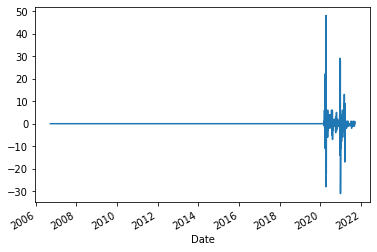

In [32]:
ts_df_short = ts_df.iloc[:,:]
ts_df_short['stimulus'].plot()

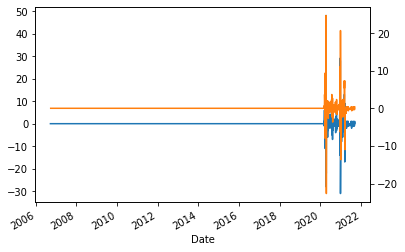

In [33]:
ts_df_short['stimulus'].plot()
ts_df_short['rolling_mean'].plot(secondary_y=True)

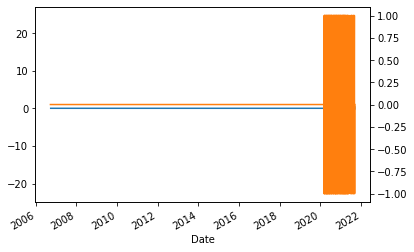

In [34]:
ts_df_short['rolling_mean'].plot()
ts_df_short['order'].plot(secondary_y=True)

In [36]:
ts_df.tail(20)

,Log Difference,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939,rolling_mean,order,log_returns,Cum_returns
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-17,-0.006901,2.0,-1.0,0.0,0.0,2.0,3.0,0.0,3.0,-1.0,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,1.0,1.0,3.0,0.0,-1.0,0.0,2.0,1.0,0.0,-1.0,2.0,1.0,-2.0,-1.0,0.0,0.0,0.0,1.0,...,-10.0,2.0,-3.0,1.0,2.0,1.0,-2.0,2.0,-2.0,0.0,-1.0,-3.0,-1.0,0.0,3.0,-2.0,5.0,-1.0,0.0,2.0,2.0,-3.0,2.0,1.0,0.0,3.0,1.0,-1.0,3.0,6.0,0.0,0.0,0.0,-1.0,3.0,0.0,0.000000,-1,-0.005688,-1.0
2021-08-18,0.002441,0.0,1.0,0.0,1.0,-2.0,-3.0,-2.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,-2.0,3.0,0.0,-2.0,7.0,0.0,2.0,3.0,1.0,5.0,-2.0,-1.0,1.0,2.0,-2.0,0.0,-1.0,-1.0,2.0,0.0,0.0,...,3.0,-1.0,0.0,-2.0,-2.0,0.0,-1.0,5.0,-1.0,0.0,0.0,1.0,2.0,0.0,-1.0,4.0,-2.0,1.0,0.0,0.0,-1.0,-3.0,-2.0,-1.0,-1.0,2.0,0.0,1.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,2.0,0.000000,0,-0.009342,-1.0
2021-08-19,-0.011032,-1.0,0.0,-1.0,-1.0,-1.0,9.0,13.0,9.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,-1.0,-3.0,0.0,0.0,-5.0,-3.0,-1.0,-4.0,-2.0,-6.0,-1.0,1.0,-1.0,7.0,0.0,3.0,1.0,0.0,-1.0,-1.0,0.0,...,-3.0,0.0,-2.0,1.0,0.0,-1.0,1.0,-7.0,1.0,0.0,-2.0,-1.0,0.0,0.0,0.0,-2.0,-1.0,-3.0,1.0,-3.0,-2.0,1.0,-1.0,0.0,2.0,2.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.000000,1,-0.013473,-1.0
2021-08-20,-0.002056,0.0,-2.0,0.0,0.0,0.0,-4.0,-20.0,-8.0,0.0,0.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,-2.0,0.0,1.0,0.0,-2.0,-2.0,-2.0,0.0,1.0,0.0,-1.0,1.0,-1.0,1.0,-13.0,0.0,-2.0,0.0,0.0,0.0,-1.0,-1.0,...,-4.0,-1.0,-1.0,0.0,0.0,-4.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-2.0,1.0,-1.0,-4.0,-7.0,0.0,-1.0,0.0,1.0,2.0,2.0,-1.0,-1.0,-8.0,0.0,1.0,-2.0,-10.0,0.0,-2.0,0.0,2.0,-2.0,-2.0,-0.333333,0,-0.008976,-1.0
2021-08-23,0.009424,0.0,1.0,2.0,0.0,3.0,-1.0,5.0,-8.0,-2.0,0.0,-8.0,0.0,-1.0,0.0,0.0,-1.0,1.0,2.0,7.0,0.0,1.0,1.0,2.0,5.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,-1.0,2.0,0.0,...,10.0,2.0,4.0,-1.0,0.0,3.0,0.0,9.0,-1.0,1.0,1.0,3.0,1.0,-1.0,2.0,4.0,7.0,4.0,1.0,4.0,3.0,3.0,0.0,2.0,2.0,0.0,1.0,-1.0,1.0,5.0,0.0,2.0,0.0,-3.0,3.0,1.0,-0.333333,-1,-0.011481,-1.0
2021-08-24,0.004882,1.0,0.0,0.0,0.0,-4.0,18.0,-4.0,2.0,2.0,0.0,10.0,1.0,1.0,0.0,0.0,2.0,-1.0,-5.0,1.0,1.0,-1.0,0.0,3.0,3.0,1.0,-2.0,-2.0,2.0,-6.0,1.0,0.0,-3.0,-1.0,0.0,1.0,0.0,-1.0,4.0,1.0,...,7.0,5.0,0.0,1.0,-1.0,0.0,0.0,-7.0,0.0,1.0,2.0,-2.0,-1.0,-1.0,0.0,4.0,-2.0,2.0,-1.0,3.0,-1.0,-3.0,-1.0,1.0,0.0,8.0,2.0,3.0,3.0,4.0,-1.0,-1.0,0.0,4.0,5.0,1.0,-0.333333,-1,-0.004542,-1.0
2021-08-25,0.004454,-2.0,1.0,-2.0,0.0,3.0,-14.0,5.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,-7.0,1.0,0.0,0.0,-4.0,-2.0,-1.0,2.0,0.0,-2.0,1.0,0.0,-1.0,0.0,1.0,-2.0,-1.0,0.0,1.0,-4.0,0.0,...,-4.0,-6.0,4.0,0.0,1.0,1.0,0.0,4.0,0.0,-1.0,-2.0,4.0,4.0,2.0,1.0,-1.0,2.0,0.0,0.0,-4.0,-1.0,2.0,3.0,-1.0,-1.0,0.0,-3.0,-2.0,-3.0,1.0,1.0,0.0,0.0,-5.0,-2.0,-1.0,0.333333,-1,-0.000428,-1.0
2021-08-26,-0.004049,0.0,0.0,0.0,1.0,0.0,-3.0,10.0,2.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.0,-2.0,0.0,-2.0,3.0,-5.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.0,-3.0,0.0,-1.0,0.0,0.0,0.0,-2.0,0.0,...,-4.0,1.0,0.0,0.0,-1.0,0.0,0.0,-2.0,1.0,-1.0,0.0,2.0,0.0,-1.0,-1.0,-5.0,-1.0,-4.0,0.0,2.0,1.0,2.0,-2.0,-1.0,-1.0,-5.0,0.0,0.0,-1.0,-2.0,0.0,-1.0,0.0,1.0,-4.0,-1.0,0.333333,1,0.008503,-1.0
2021-08-27,0.004856,1.0,2.0,0.0,-1.0,-3.0,-2.0,-3.0,0.0,-1.0,0.0,-4.0,0.0,1.0,-1.0,0.0,-1.0,-1.0,-3.0,-1.0,0.0,0.0,0.0,6.0,-2.0,-1.0,4.0,-1.0,0.0,-1.0,-1.0,0.0,4.0,-1.0,0.0,-1.0,0.0,0.0,1.0

In [37]:
# Compute log returns using djia and debt search volume from Preis et al.
ts_df['log_returns'] = 0
ts_df['log_returns'] = ts_df['order'] * (ts_df['Log Difference'].shift(1)) - ts_df['order'] * ts_df['Log Difference']
# Compute log returns using S&P500.
#ts_df['log_returns_sp'] = data.order_preis * np.log(data.sp500.shift(-1)) - data.order_preis * np.log(data.sp500)
# Compute log returns using debt search volume recently extracted from trends
#ts_df['log_returns_new_data'] = data.order * np.log(data.djia_preis.shift(-1)) - data.order * np.log(data.djia_preis)

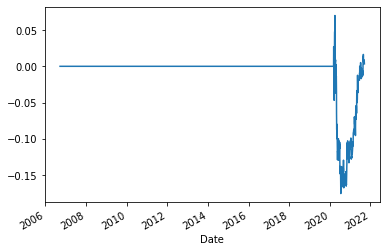

In [38]:
#plt.figsize(10, 3)
(np.exp(ts_df.log_returns.cumsum()) - 1).plot();

In [39]:
log_ret = (np.exp(ts_df.log_returns.cumsum()) - 1)
(log_ret.iloc[-1]-1)/(log_ret.std())

-31.696786022638946

#Function

In [19]:
def trend_strategy(data_frame, trend_name, delta_t):

  data_frame['rolling_mean'] = data_frame[trend_name].rolling(delta_t).mean().shift(1)

  data_frame['order'] = 0
  data_frame['order'][data_frame[trend_name] > data_frame.rolling_mean.shift(1)] = -1 # Shorting if cross-over
  data_frame['order'][data_frame[trend_name] < data_frame.rolling_mean.shift(1)] = 1 # Buying otherwise.
  data_frame['order'].iloc[:delta_t] = 0

  data_frame['log_returns'] = data_frame['order'] * (data_frame['Log Difference'].shift(1)) - data_frame['order'] * data_frame['Log Difference']

  data_frame['Cum_returns'] = (np.exp(data_frame.log_returns.cumsum()) - 1)

  trend_port_SD = data_frame['Cum_returns'].std()

  trend_port_ER = data_frame['Cum_returns'].iloc[-1] - 1

  trend_port_SR = trend_port_ER/trend_port_SD

  return [trend_name, trend_port_SD, trend_port_ER, trend_port_SR]

In [20]:
dfs = []

In [21]:
for column in ts_df:

    dfs.append(trend_strategy(ts_df, column, 3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is tryi

In [22]:
SD_df = pd.DataFrame(dfs)

In [23]:
SD_DF = SD_df.iloc[1:155,:]
SD_DF.columns = ['Trends','Standard Deviation','Expected Return','Sharpe Ratio']

In [24]:
SD_DF_Sort = SD_DF.sort_values(by=['Sharpe Ratio'], ascending=False)
SD_DF_Sort['Pos_Neg'] = [1 if i > 0 else -1 for i in SD_DF_Sort['Sharpe Ratio']]

In [25]:
import plotly.express as px

fig = px.bar(SD_DF_Sort, x='Trends', y='Sharpe Ratio', color="Pos_Neg", title="Google Trends Long-Short Portfolio")
fig.show()

#Rolling Functions

In [40]:
ts_df_4500 = ts_df.iloc[0:4500,:]

In [41]:
df_num_rows = ts_df_4500.shape[0]

In [42]:
dfs = []

In [44]:
for i in range(0, df_num_rows, 250):

  print(i)

  ts_df_short = ts_df_4500.iloc[i:i+250,:]

  #print(ts_df_short.head(2))

  for column in ts_df_short:
    dfs.append(trend_strategy(ts_df_short, column, 3))

Output hidden; open in https://colab.research.google.com to view.

In [45]:
chunks = [dfs[x:x+159] for x in range(0, len(dfs), 159)]

In [46]:
for i in range(0,len(chunks),1):
  p = pd.DataFrame(chunks[i])
  p = p.iloc[1:155,:]
  p.columns = ['Trends','Standard Deviation','Expected Return','Sharpe Ratio']
  p = p.sort_values(by=['Sharpe Ratio'], ascending=False)
  p['Pos_Neg'] = [1 if i > 0 else -1 for i in p['Sharpe Ratio']]

  fig = px.bar(p, x='Trends', y='Sharpe Ratio', color="Pos_Neg", title=f"Google Trends Long-Short Portfolio {2004+i}")
  fig.show()